# Data Preprocessing

### Data preprocessing is a crucial step in data analysis and machine learning. It involves transforming raw data into a clean, structured format suitable for analysis. This process improves the quality of the data, reduces errors, and enhances the performance of machine learning models.

In [ ]:
#Import the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/insurance.csv")

In [ ]:
#display first rows of the dataset
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
#displays the last 5 rows of the dataset
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
data.shape

(1338, 7)

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
data.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [ ]:
data["charges"].max()

63770.42801

# Statistical Analysis

### Statistical analysis is the process of using numbers to understand data better, uncovering patterns or trends within it, and using these insights to make informed decisions or draw conclusions

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
numeric_columns = ['age', 'bmi', 'children', 'charges']

In [ ]:
mean = data[numeric_columns].mean()
mean

age            39.207025
bmi            30.663397
children        1.094918
charges     13270.422265
dtype: float64

In [ ]:
median = data[numeric_columns].median()
median

age           39.000
bmi           30.400
children       1.000
charges     9382.033
dtype: float64

In [ ]:
data.mode()

,age,sex,bmi,children,smoker,region,charges
0,18,male,32.3,0,no,southeast,1639.5631


In [ ]:
#used to display the basic statistics on the dataset
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
std = data[numeric_columns].std()
std

age            14.049960
bmi             6.098187
children        1.205493
charges     12110.011237
dtype: float64

In [ ]:
data["smoker"].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

# Handling Null Values

In [ ]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
#Code for handlling with Null values
data['age'].fillna(data['age'].mean(),inplace=True)

# Data Visualization

### Data visualization refers to the graphical representation of data to communicate information effectively and efficiently. It involves creating visual elements such as charts, graphs, and maps to convey insights, patterns, trends, and relationships within the data.

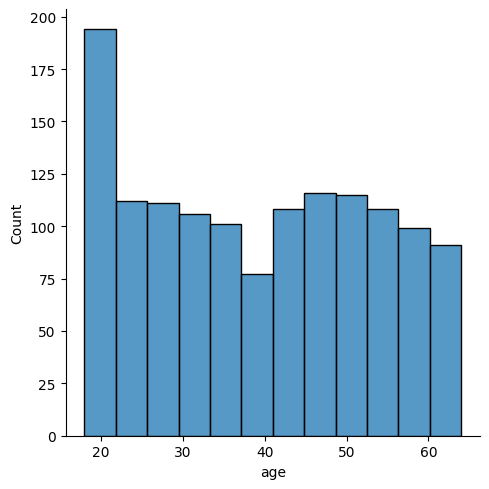

In [ ]:
sns.displot(data['age'])

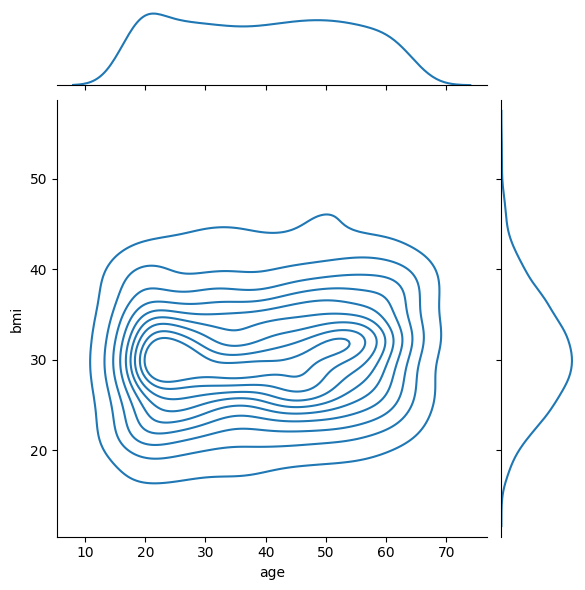

In [ ]:
sns.jointplot(x=data['age'], y=data['bmi'], kind="kde")

<Axes: xlabel='age', ylabel='charges'>

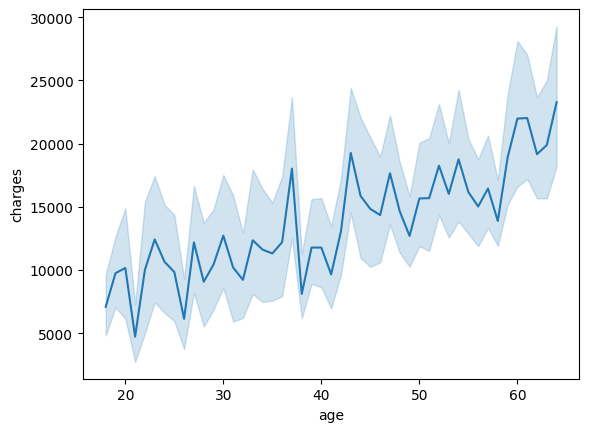

In [ ]:
sns.lineplot(x=data['age'], y=data['charges'])

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: ylabel='bmi'>

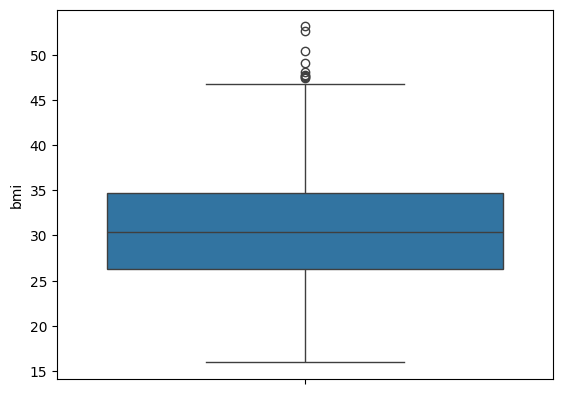

In [ ]:
sns.boxplot(data['bmi'])

## Anything that lies outside of lower and upper bound is an Outlier

### Steps to Detect Outliers
1. Calculate first(q1) and third quartile(q3)
2. Find interquartile range (q3-q1)
3. Find lowerBound q1-1.5IQR
4. Find upperBound q3+1.5IQR

IQR = q3-q1

upperBound = q3 + 1.5*IQR

lowerBound = q1 - 1.5*IQR


# Which Machine Learning Models Are Sensitive To Outliers?
### Naivye Bayes Classifier--- Not Sensitive To Outliers
### SVM-------- Not Sensitive To Outliers
### Linear Regression---------- Sensitive To Outliers
### Logistic Regression------- Sensitive To Outliers
### Decision Tree Regressor or Classifier---- Not Sensitive
### Ensemble(RF,XGboost,GB)------- Not Sensitive
### KNN--------------------------- Not Sensitive
### Kmeans------------------------ Sensitive
### Hierarichal------------------- Sensitive
### PCA-------------------------- Sensitive
### Neural Networks-------------- Sensitive

In [ ]:
IQR = data['bmi'].quantile(0.75)-data['bmi'].quantile(0.25)
IQR

8.3975

In [ ]:
lowerBound=data['bmi'].quantile(0.25)-(1.5*IQR)
lowerBound

13.7

In [ ]:
upperBound=data['bmi'].quantile(0.75)+(1.5*IQR)
upperBound

47.290000000000006

In [ ]:
data['bmi']=np.where(data['bmi']>upperBound,upperBound,data['bmi'])
data['bmi']=np.where(data['bmi']<lowerBound,lowerBound,data['bmi'])

<Axes: ylabel='bmi'>

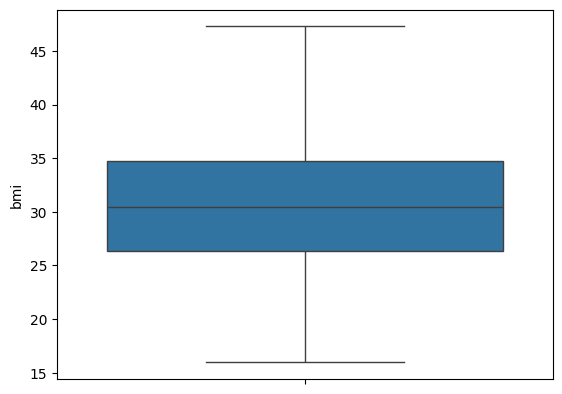

In [ ]:
sns.boxplot(data['bmi'])

# LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label_encoder = LabelEncoder()

In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])


In [ ]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


# Seperating Data

In [ ]:
x=data.drop(columns=['charges'],axis=1)
y=data["charges"]

In [ ]:
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
X = sc.fit_transform(x)

In [ ]:
X

array([[-1.43876426, -1.0105187 , -0.45420102, -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.51529985, -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38812512,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.02399878, -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.8010412 , -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.2609615 , -0.90861367,  1.97058663,
        -0.46691549]])

In [ ]:
X = pd.DataFrame(x)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


# Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.head()

In [ ]:
x_test.head()

In [ ]:
y_train.head()

In [ ]:
y_test.head()

# Model Building